# Liberaries

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, median_absolute_error
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category = ConvergenceWarning)

# Read Data

In [8]:
URL = 'https://raw.githubusercontent.com/ahmedali6102001/House_prices_dataset/main/kc_house_data.csv'
data = pd.read_csv(URL)
data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


# Data Description

In [9]:
#Data shape
data.shape

(21613, 21)

In [10]:
#columns in dataset
data.columns.tolist()

['id',
 'date',
 'price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15']

In [11]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

# X & y Data

In [13]:
X = data.drop('price', axis=1)
X

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [14]:
y = data['price']
y

0        221900.0
1        538000.0
2        180000.0
3        604000.0
4        510000.0
           ...   
21608    360000.0
21609    400000.0
21610    402101.0
21611    400000.0
21612    325000.0
Name: price, Length: 21613, dtype: float64

# Numerical & Non_numerical Columns

In [15]:
numerical_columns = X.select_dtypes(include=['number']).columns
non_numerical_columns = X.select_dtypes(exclude=['number']).columns

In [16]:
numerical_columns.tolist()

['id',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15']

In [17]:
non_numerical_columns.tolist()

['date']

In [18]:
for i in X.index:
  X['date'].iloc[i] = X['date'].iloc[i][:7]
X

<ipython-input-18-5db54fe5a38a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['date'].iloc[i] = X['date'].iloc[i][:7]


,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014101,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014120,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015022,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014120,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015021,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,2014052,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,2015022,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,2014062,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,2015011,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


# Quantitative & Categorical Columns

In [19]:
quantitative, categorical = [], []
for i in X:
    if len(X[i].unique()) > 10:
        quantitative.append(i)

    else:
        categorical.append(i)

In [20]:
quantitative

['id',
 'date',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15']

In [21]:
categorical

['floors', 'waterfront', 'view', 'condition']



```
# This is formatted as code
```

# X Data Description and Visualization

In [22]:
for i in X[numerical_columns]:
    print(str(i).center(30))
    print(X[i].describe())
    print('='*50)

              id              
count    2.161300e+04
mean     4.580302e+09
std      2.876566e+09
min      1.000102e+06
25%      2.123049e+09
50%      3.904930e+09
75%      7.308900e+09
max      9.900000e+09
Name: id, dtype: float64
           bedrooms           
count    21613.000000
mean         3.370842
std          0.930062
min          0.000000
25%          3.000000
50%          3.000000
75%          4.000000
max         33.000000
Name: bedrooms, dtype: float64
          bathrooms           
count    21613.000000
mean         2.114757
std          0.770163
min          0.000000
25%          1.750000
50%          2.250000
75%          2.500000
max          8.000000
Name: bathrooms, dtype: float64
         sqft_living          
count    21613.000000
mean      2079.899736
std        918.440897
min        290.000000
25%       1427.000000
50%       1910.000000
75%       2550.000000
max      13540.000000
Name: sqft_living, dtype: float64
           sqft_lot           
count    2.161300e+

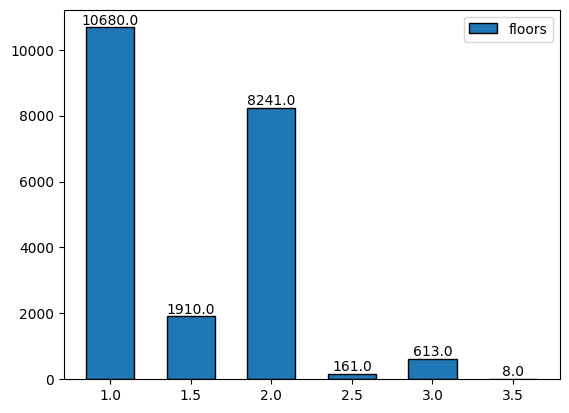

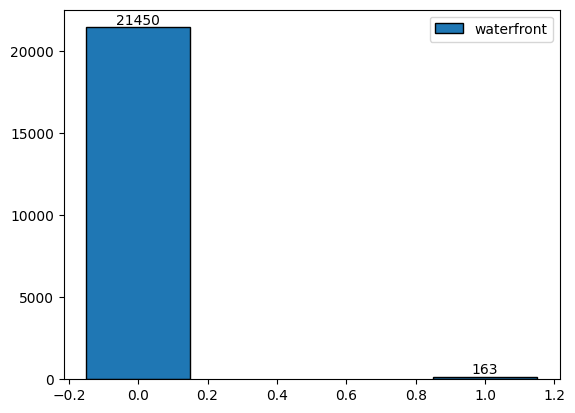

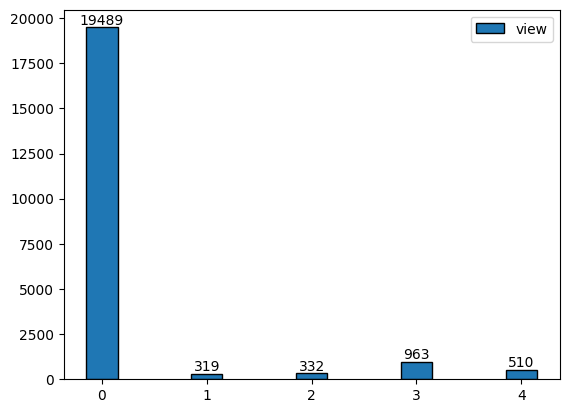

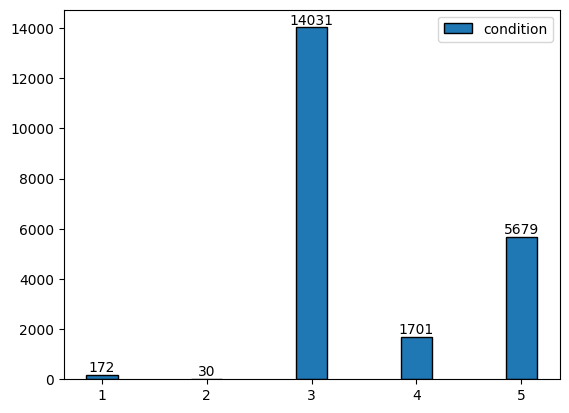

In [23]:
for i in X[categorical]:
    d = np.transpose(pd.DataFrame([X[i].unique(), X[i].value_counts()], index=['value', 'count']))
    plt.bar(d['value'], d['count'], width=0.3, edgecolor='k', label=i)
    for q, w in zip(d['value'], d['count']):
        plt.text(q, w, w, ha='center', va='bottom')
    plt.legend()
    plt.show()

            floors            


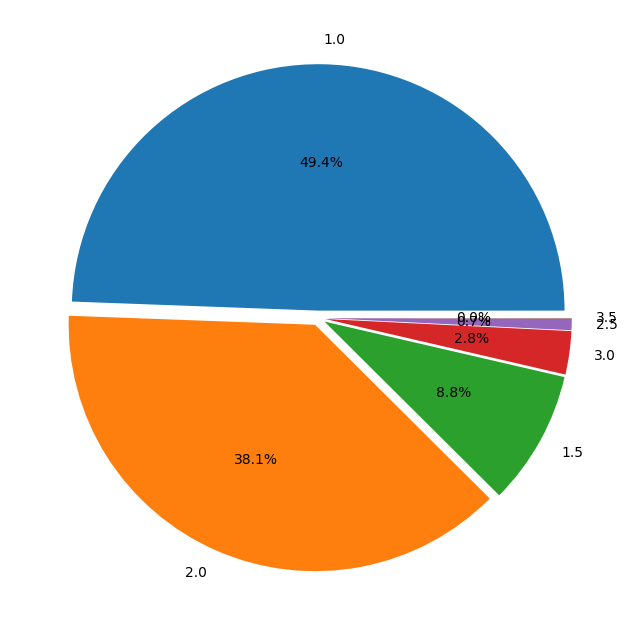

          waterfront          


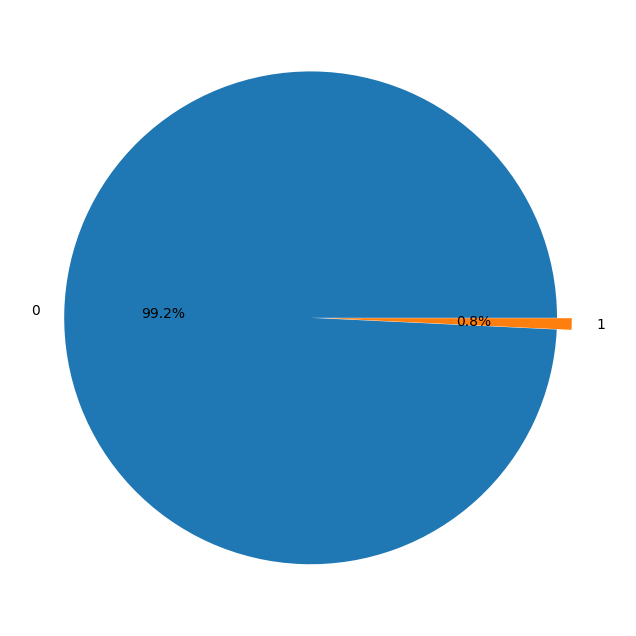

             view             


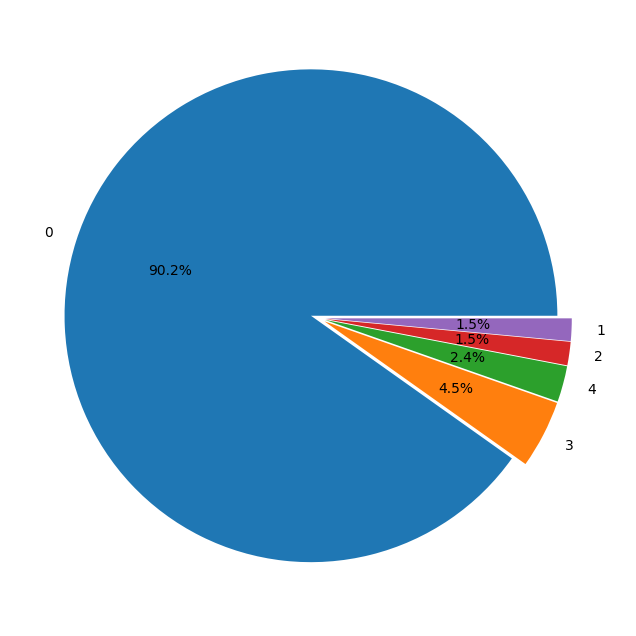

          condition           


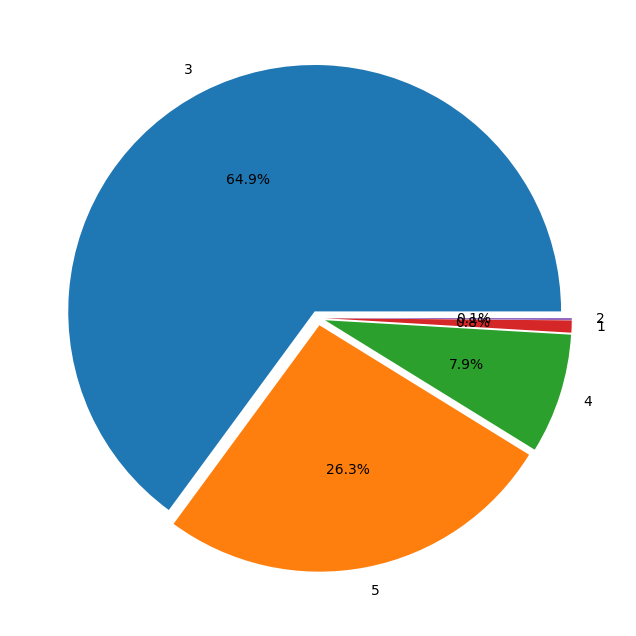

In [24]:
for i in X[categorical]:
    print(str(i).center(30))
    plt.figure(figsize=(8,8))
    a = X[i].value_counts()
    b = X[i].unique()
    plt.pie(a, labels=b, explode=[0.03 for i in a], autopct='%1.1f%%')
    plt.show()
    print('='*70)

In [ ]:
for i in X[set(quantitative).difference( non_numerical_columns)]:
    sns.histplot(X[i], kde=True, label=i, alpha=0.2)
    plt.legend()
    plt.show()

# y Data Description and Visualization

In [26]:
y.describe()

count    2.161300e+04
mean     5.400881e+05
std      3.671272e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

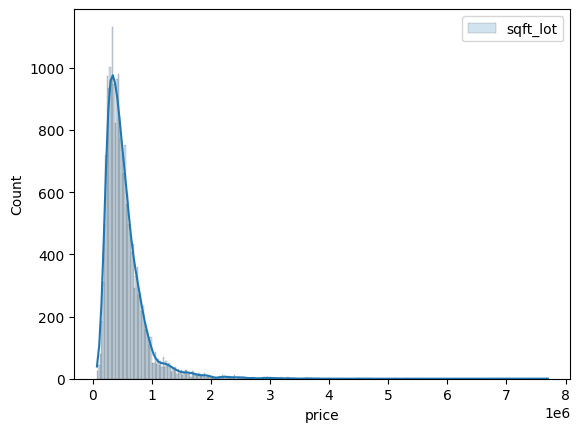

In [27]:
sns.histplot(y, kde=True, label=i, alpha=0.2)
plt.legend()
plt.show()

# Correlation Matrix

In [28]:
corr_mat = data.corr()
corr_mat

<ipython-input-28-79907eedfcac>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_mat = data.corr()


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016762,0.001286,0.005160,-0.012258,-0.132109,0.018525,-0.002721,0.011592,-0.023783,0.008130,-0.010842,-0.005151,0.021380,-0.016907,-0.008224,-0.001891,0.020799,-0.002901,-0.138798
price,-0.016762,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
bedrooms,0.001286,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.005160,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,-0.012258,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,-0.132109,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.018525,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,-0.002721,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.011592,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,-0.023783,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406


<Axes: >

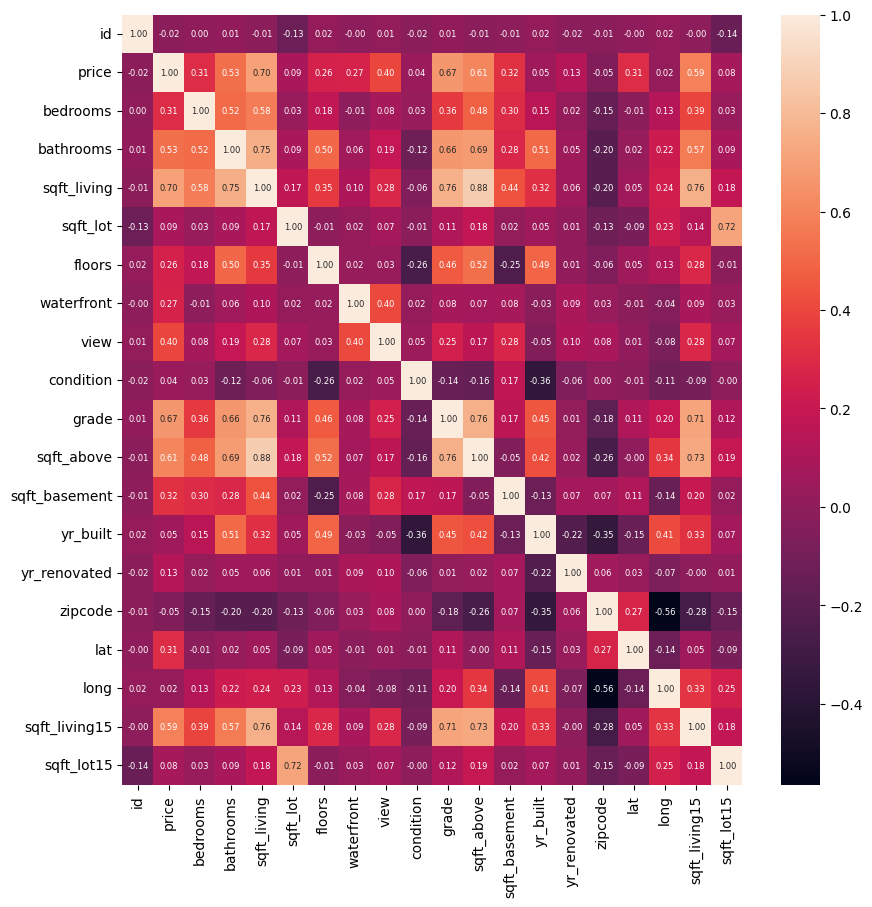

In [29]:
plt.figure(figsize=(10,10))
sns.heatmap(corr_mat, annot=True, annot_kws={'size':6}, fmt='.2f')

<Axes: xlabel='sqft_above', ylabel='sqft_living'>

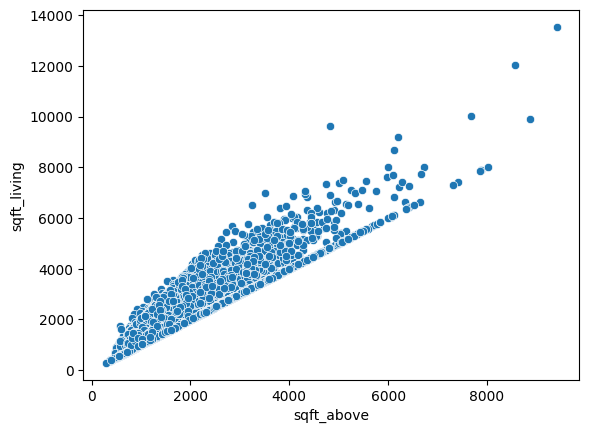

In [30]:
#strong positive relationship between columns[sqft_above , sqft_living]
sns.scatterplot(x=data['sqft_above'], y=data['sqft_living'])

<ipython-input-31-20dcf549c45a>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  labeled_corr_mat = data.corr()[['price']].sort_values(by='price', ascending=False)


<Axes: >

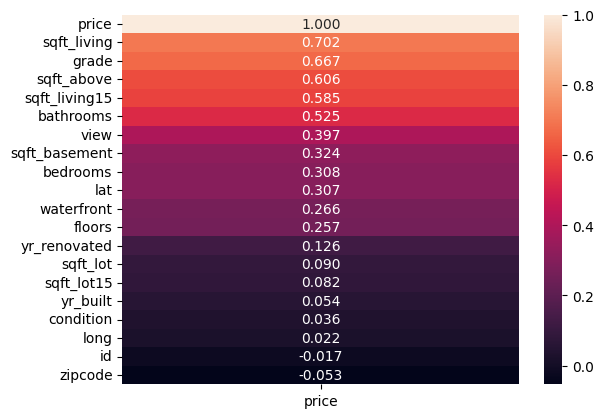

In [31]:
labeled_corr_mat = data.corr()[['price']].sort_values(by='price', ascending=False)
sns.heatmap(labeled_corr_mat, annot=True, fmt='.3f')

<Axes: xlabel='sqft_living', ylabel='price'>

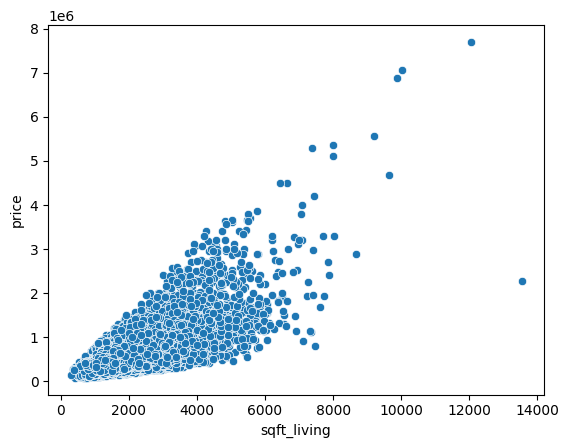

In [32]:
sns.scatterplot(x=data['sqft_living'], y=data['price'])

# Label Normality

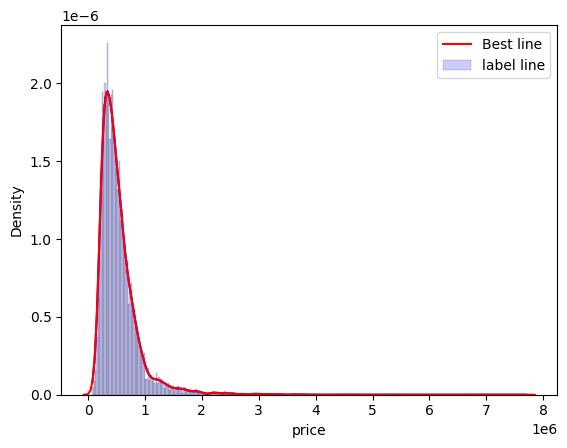

In [33]:
normal = np.random.normal(y.mean(), y.std(), (len(y),))
sns.histplot(y, kde=True, alpha=0.2, color='b', label='label line', stat='density')
sns.kdeplot(y, color='r', label='Best line')
plt.legend()

**The two lines are identical so the labeled data is normal**

# Unuseful Features Drop

In [34]:
try:
  X.drop(['id', 'date'], axis=1, inplace=True)

except:
  pass

X

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


# Training & Testing & Cross_validation Data




In [35]:
X_train, X_test_val, y_train, y_test_val = train_test_split(X, y, test_size=0.4, shuffle=True, random_state=44)
X_train

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
13794,2,2.75,2820,11770,2.0,0,0,3,7,1630,1190,1947,0,98168,47.5102,-122.324,1690,12500
14051,2,2.00,1200,7131,1.0,0,0,3,8,1200,0,2006,0,98053,47.7199,-122.022,1670,4601
16654,3,2.50,2600,5540,2.0,0,0,3,8,2600,0,2004,0,98038,47.3446,-122.041,2600,5540
14185,3,4.00,4200,30120,2.0,0,2,4,11,3600,600,1933,0,98112,47.6379,-122.311,2760,12200
15071,3,1.75,1840,4255,1.0,0,0,3,7,940,900,1907,2005,98116,47.5800,-122.392,1600,4255
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18528,4,2.00,1700,6025,1.0,0,0,3,6,1700,0,1978,0,98002,47.3029,-122.221,1320,5956
20355,3,3.50,3420,23786,1.5,0,0,3,9,3420,0,2014,0,98059,47.4739,-122.110,1590,23774
16955,3,1.50,1330,7600,1.0,0,0,4,7,1330,0,1968,0,98023,47.3103,-122.366,1500,7776
3491,4,1.00,1400,6739,1.0,0,0,3,7,1000,400,1954,0,98108,47.5402,-122.298,1500,6380


In [36]:
X_test, X_val, y_test, y_val = train_test_split(X_test_val, y_test_val, test_size=0.5, shuffle=True)

# Find Best Values of Hyper Parameters


In [37]:
ridge = Ridge()
dictionary = {'alpha':[i/3 for i in range(20)]}
grid = GridSearchCV(ridge, dictionary)
grid.fit(X_train, y_train)
grid.best_estimator_

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=3.2303e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.10125e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=9.8149e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=5.04105e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Ridge(alpha=5.666666666666667)

In [42]:
lasso = Lasso()
dictionary = {'alpha':range(70,100,2)}
grid = GridSearchCV(lasso, dictionary)
grid.fit(X_train, y_train)
grid.best_estimator_

Lasso(alpha=78)

In [45]:
DT = DecisionTreeRegressor()
dictionary = {'max_depth':range(10,110,10), 'min_samples_split':[5,10,15,20,25,30,35,40], 'max_features':[2,4,6,8,10,12,14,16,18]}
randomized = RandomizedSearchCV(DT, dictionary, n_iter=50)
randomized.fit(X_train, y_train)
randomized.best_estimator_

DecisionTreeRegressor(max_depth=20, max_features=14, min_samples_split=35)

In [47]:
RF = RandomForestRegressor()
dictionary = {'n_estimators':range(10,110,10), 'max_depth':range(10,110,10),
              'min_samples_split':[5,10,15,20,25,30,35,40], 'max_features':[2,4,6,8,10,12,14,16,18]}
randomized = RandomizedSearchCV(RF, dictionary, n_iter=10)
randomized.fit(X_train, y_train)
randomized.best_estimator_

RandomForestRegressor(max_depth=90, max_features=6, min_samples_split=5,
                      n_estimators=70)

# Models Definition

In [48]:
linearReg = LinearRegression(n_jobs=-1)

lasso = Lasso(alpha=78)

ridge = Ridge(alpha=5.666666666666667)

DT = DecisionTreeRegressor(max_depth=20, max_features=14, min_samples_split=35)

RF = RandomForestRegressor(max_depth=90, max_features=6, min_samples_split=5,
                      n_estimators=70)

In [49]:
Models = {'LinearRegression':linearReg,
          'Lasso':lasso,
          'Ridge': ridge,
          'DecisionTreeRegressor' : DT,
          'RandomForestRegressor' : RF
         }

In [61]:
best_model = None
best_mse = 100000000000
for model in Models.keys():
    #Model Fitting
    Models[model].fit(X_train, y_train)
    print(str(model).center(30))

    #_______________________________________________________
    #Prediction
    y_pred = Models[model].predict(X_val)

    #_______________________________________________________
    #metrices
    mae = mean_absolute_error(y_val, y_pred, multioutput="uniform_average")
    mse = mean_squared_error(y_val, y_pred, multioutput="uniform_average")
    Medae = median_absolute_error(y_val, y_pred, multioutput="uniform_average")

    if best_mse > mse:
      best_model = model
      best_mse = mse

    #_______________________________________________________
    #Score
    print('Validation Score:', Models[model].score(X_train, y_train))
    print('Testing Score:', Models[model].score(X_val, y_val))

    #_______________________________________________________
    print()
    print('mean_absolute_error',mae)
    print('mean_squared_error',mse)
    print('Root_mean_squared_error',np.sqrt(mse))
    print('median_absolute_error',Medae)
    print('==========================================================')

       LinearRegression       
Training Score: 0.7048815627437262
Testing Score: 0.7093844832750791

mean_absolute_error 122449.57635414528
mean_squared_error 36154175780.61047
Root_mean_squared_error 190142.51439541468
median_absolute_error 85121.99187915586
            Lasso             
Training Score: 0.7048675133553493
Testing Score: 0.7093350364338704

mean_absolute_error 122392.84729910818
mean_squared_error 36160327240.82498
Root_mean_squared_error 190158.6896274398
median_absolute_error 85098.77733135596
            Ridge             
Training Score: 0.7047714400664815
Testing Score: 0.7091719062110113

mean_absolute_error 122394.59793607704
mean_squared_error 36180621541.758545
Root_mean_squared_error 190212.04362962546
median_absolute_error 85068.45268008532
    DecisionTreeRegressor     
Training Score: 0.8855657314322706
Testing Score: 0.7587020266733895

mean_absolute_error 92514.7690192311
mean_squared_error 30018800928.00714
Root_mean_squared_error 173259.34586049648
me

In [62]:
print('Best Model:', best_model)
print('Best MSE:', best_mse)

Best Model: RandomForestRegressor
Best MSE: 16748697617.043688


# Model Evaluate

In [63]:
y_submit = RF.predict(X_test)
mae = mean_absolute_error(y_test, y_submit, multioutput="uniform_average")
mse = mean_squared_error(y_test, y_submit, multioutput="uniform_average")
Medae = median_absolute_error(y_test, y_submit, multioutput="uniform_average")

#_______________________________________________________
#Score
print('Training Score:', Models[model].score(X_train, y_train))
print('Testing Score:', Models[model].score(X_test, y_test))

#_______________________________________________________
print()
print('mean_absolute_error',mae)
print('mean_squared_error',mse)
print('Root_mean_squared_error',np.sqrt(mse))
print('median_absolute_error',Medae)
print('==========================================================')

Training Score: 0.9716565930434888
Testing Score: 0.8463388141464177

mean_absolute_error 75191.83564575568
mean_squared_error 22096540120.0893
Root_mean_squared_error 148649.05018226418
median_absolute_error 41755.5513296228
